In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv(r"D:\Data_Science\datasets\netflix\netflix_titles.csv")
df.sample(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5274,s5275,TV Show,Offspring,NaN,"Asher Keddie, Kat Stewart, Richard Davies, Lin...",Australia,"September 13, 2017",2017,TV-MA,7 Seasons,"TV Comedies, TV Dramas",A Melbourne obstetrician in her thirties strug...
1025,s1026,TV Show,Bakugan: Geogan Rising,NaN,"Jonah Wineberg, Margarita Valderrama, Deven Ch...",NaN,"April 16, 2021",2021,TV-Y7,1 Season,"Anime Series, Kids' TV",The Awesome Brawlers band together to fight of...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [16]:
df1=df[df['type']=='Movie']

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\HP\AppData\Local\Temp\ipykernel_13792\1731949026.py:1: SyntaxWarning: invalid escape sequence '\d'
  df1['duration_minutes'] = df1['duration'].str.extract('(\d+)').astype(float)
C:\Users\HP\AppData\Local\Temp\ipykernel_13792\1731949026.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['duration_minutes'] = df1['duration'].str.extract('(\d+)').astype(float)


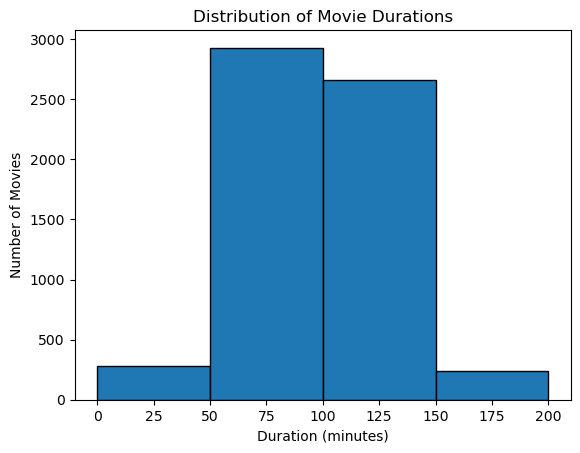

In [17]:
df1['duration_minutes'] = df1['duration'].str.extract('(\d+)').astype(float)

# Plot histogram
plt.hist(df1['duration_minutes'], bins=[0, 50, 100, 150, 200], edgecolor='black')
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.show()

In [14]:
df[df['rating'].str.contains('min', na=False)]
df=df[~(df['rating'].str.contains('min', na=False))]

In [21]:
df['rating'].fillna(method='ffill',inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_13792\3708924150.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['rating'].fillna(method='ffill',inplace=True)


In [22]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

<>:9: SyntaxWarning: invalid escape sequence '\d'
<>:9: SyntaxWarning: invalid escape sequence '\d'
C:\Users\HP\AppData\Local\Temp\ipykernel_13792\1946979312.py:9: SyntaxWarning: invalid escape sequence '\d'
  df1['duration_minutes'] = df1['duration'].str.extract('(\d+)').astype(float)


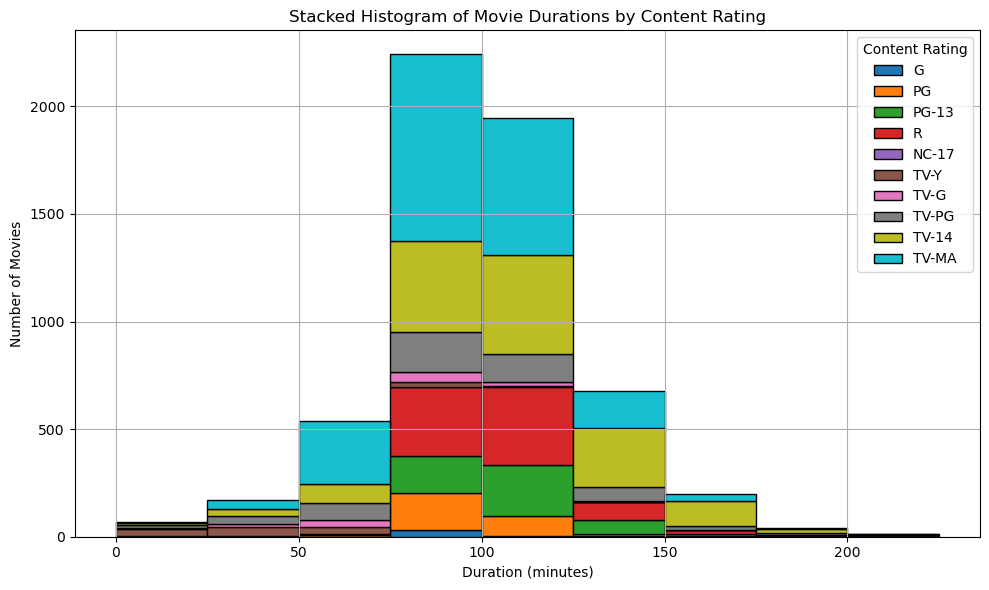

In [23]:
#Difficult: Plot stacked histograms of durations by content rating (TV-MA, PG, etc.)
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Filter only movies
df1 = df[df['type'] == 'Movie'].copy()

# Step 2: Clean 'duration' column (extract number from '120 min', etc.)
df1['duration_minutes'] = df1['duration'].str.extract('(\d+)').astype(float)

# Step 3: Drop rows with missing durations or ratings
df1 = df1.dropna(subset=['duration_minutes', 'rating'])

# Optional: Filter only common ratings to reduce clutter
valid_ratings = ['G', 'PG', 'PG-13', 'R', 'NC-17', 'TV-Y', 'TV-G', 'TV-PG', 'TV-14', 'TV-MA']
df1 = df1[df1['rating'].isin(valid_ratings)]

# Step 4: Group durations by rating
grouped = [df1[df1['rating'] == rating]['duration_minutes'] for rating in valid_ratings]

# Step 5: Plot stacked histogram
plt.figure(figsize=(10,6))
plt.hist(grouped, bins=range(0, 250, 25), stacked=True, label=valid_ratings, edgecolor='black')

plt.title('Stacked Histogram of Movie Durations by Content Rating')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.legend(title='Content Rating')
plt.grid(True)
plt.tight_layout()
plt.show()


In [26]:
df2=pd.read_csv(r"D:\Data_Science\datasets\imdb\IMDb_movies.csv")
df2.head(2)

C:\Users\HP\AppData\Local\Temp\ipykernel_13792\126316841.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df2=pd.read_csv(r"D:\Data_Science\datasets\imdb\IMDb_movies.csv")


,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,NaN,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,NaN,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0


In [29]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          85855 non-null  object 
 1   title                  85855 non-null  object 
 2   original_title         85855 non-null  object 
 3   year                   85855 non-null  object 
 4   date_published         85855 non-null  object 
 5   genre                  85855 non-null  object 
 6   duration               85855 non-null  int64  
 7   country                85791 non-null  object 
 8   language               84954 non-null  object 
 9   director               85768 non-null  object 
 10  writer                 84283 non-null  object 
 11  production_company     81400 non-null  object 
 12  actors                 85786 non-null  object 
 13  description            83740 non-null  object 
 14  avg_vote               85855 non-null  float64
 15  vo

In [31]:
df2['genre']=df2['genre'].str.split(',').str[0]

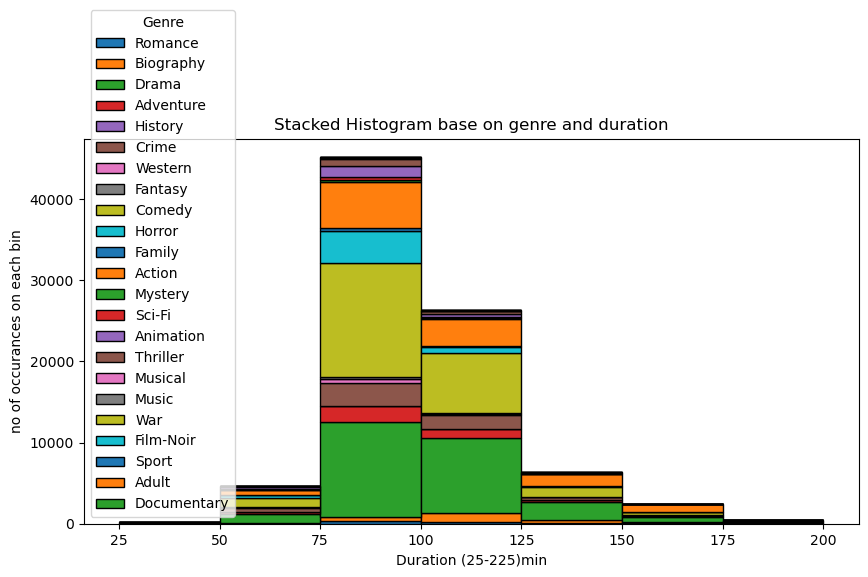

In [39]:
grouped=[df2[df2['genre']==g]['duration'] for g in df2.genre.unique()]
l1=list(df2.genre.unique())
plt.figure(figsize=(10,5))
plt.title("Stacked Histogram base on genre and duration")
plt.xlabel("Duration (25-225)min")
plt.ylabel("no of occurances on each bin")
plt.hist(grouped,bins=range(25,225,25),stacked=True,label=l1,edgecolor='black')
plt.legend(title="Genre")
plt.show()